<a href="https://colab.research.google.com/github/savindumahasen/MRI-Brain-Tumor-Classification/blob/main/BrainTumorClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [974]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q
!pip install opendatasets -q

In [975]:
## import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import opendatasets as od

In [976]:
## username  and password is contains  kaggle.json file please use it for download the dataset

od.download("https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset")

Skipping, found downloaded files in "./brain-tumor-mri-dataset" (use force=True to force download)


In [977]:
## define the batch size and image size
BATCH_SIZE=32
IMAGE_SIZE=(128,128)

In [978]:
## Define the train and tes set director path
train_dir="/content/brain-tumor-mri-dataset/Training"
test_dir="/content/brain-tumor-mri-dataset/Testing"

In [979]:
## split the train set into train set and  validation set

## define the batch size and image size
BATCH_SIZE=32
IMAGE_SIZE=(128,128)

## Define the train and tes set director path
train_dir="/content/brain-tumor-mri-dataset/Training"
test_dir="/content/brain-tumor-mri-dataset/Testing"

train_set=tf.keras.utils.image_dataset_from_directory(train_dir,
                                                      batch_size=BATCH_SIZE,
                                                      image_size=IMAGE_SIZE,
                                                      subset='training',
                                                      validation_split=0.1,
                                                      seed=42)
validation_set=tf.keras.utils.image_dataset_from_directory(train_dir,
                                                           batch_size=BATCH_SIZE,
                                                           image_size=IMAGE_SIZE,
                                                           subset='validation',
                                                           validation_split=0.1,
                                                           seed=42
                                                           )

Found 5712 files belonging to 4 classes.
Using 5141 files for training.
Found 5712 files belonging to 4 classes.
Using 571 files for validation.


In [980]:
## Load the test set

test_set=tf.keras.utils.image_dataset_from_directory(test_dir,
                                                           batch_size=BATCH_SIZE,
                                                           image_size=IMAGE_SIZE,
                                                           )

Found 1311 files belonging to 4 classes.


In [981]:
## Get the target values

In [982]:
class_names=train_set.class_names
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [983]:
## Look at the one batch

In [984]:
for image_size, label_batch in train_set.take(1):
  print(image_size.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


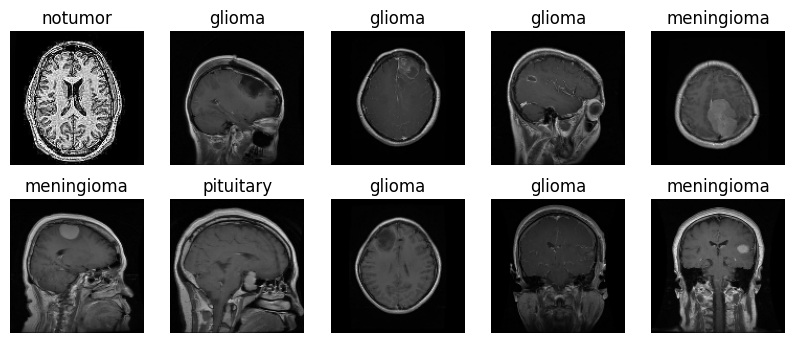

In [985]:
## Plot the data sample
plt.figure(figsize=(10,4))
for image,label in train_set.take(1):
  for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [986]:
for image,label in train_set.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   ...
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]]

  [[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   ...
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]]

  [[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   ...
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]]

  ...

  [[ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   ...
   [ 0.          0.          0.        ]
   [ 0.          0.          0.        ]
   [ 

In [987]:
train_data=train_set.map(lambda x,y:(x/255,y))
validation_data=validation_set.map(lambda x,y:(x/255,y))
#test_data=test_set.map(lambda x,y:(x/255,y))

In [988]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.      

In [989]:
## Data Augmentation

In [990]:
#data_augmentation=tf.keras.Sequential([
 #   tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
 #   tf.keras.layers.RandomRotation(0.2),
 #   tf.keras.layers.RandomZoom(0.2)
#])

In [991]:
## Build the CNN model

model=tf.keras.models.Sequential()
#model.add(data_augmentation)
model.add(tf.keras.layers.Conv2D(32,kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(64,kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(128,kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))

model.add(tf.keras.layers.Dense(4,activation='softmax'))

In [992]:
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [993]:
## Complite the model
# Set random seeds
import random
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [994]:
## train the CNN architecture model

In [995]:
start_time=time.time()
history=model.fit(train_data,validation_data=validation_data, epochs=19)
end_time=time.time()

Epoch 1/19
161/161 ━━━━━━━━━━━━━━━━━━━━ 24s 89ms/step - accuracy: 0.7093 - loss: 0.7271 - val_accuracy: 0.7758 - val_loss: 1.0661
Epoch 2/19
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.8527 - loss: 0.3469 - val_accuracy: 0.8476 - val_loss: 0.5805
Epoch 3/19
161/161 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.9184 - loss: 0.2125 - val_accuracy: 0.8844 - val_loss: 0.3368
Epoch 4/19
161/161 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.9444 - loss: 0.1526 - val_accuracy: 0.9352 - val_loss: 0.2171
Epoch 5/19
161/161 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.9665 - loss: 0.0938 - val_accuracy: 0.8616 - val_loss: 0.4544
Epoch 6/19
161/161 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9687 - loss: 0.0907 - val_accuracy: 0.9457 - val_loss: 0.2027
Epoch 7/19
161/161 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9808 - loss: 0.0566 - val_accuracy: 0.9405 - val_loss: 0.2238
Epoch 8/19
161/161 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.9802 - loss: 0.0571 - val_

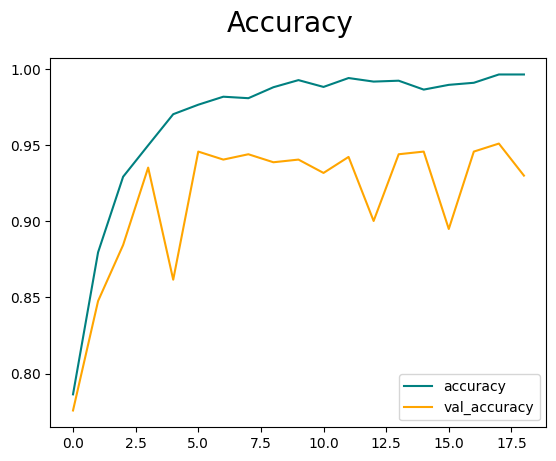

In [996]:
## plot the  accuracy  and  validation_accuracy
fig=plt.figure()
plt.plot(history.history['accuracy'], color='teal',label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
plt.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

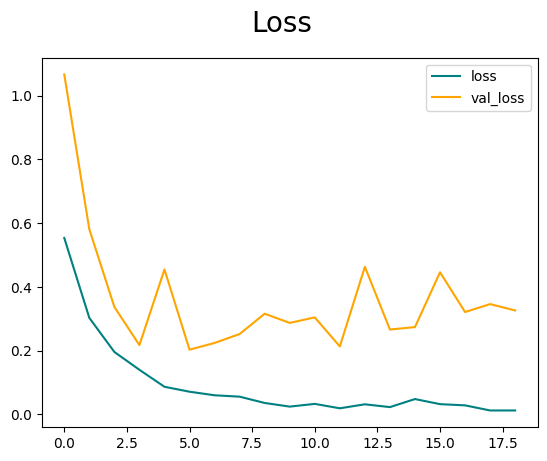

In [997]:
## plot the  loss  and  validation_loss
fig=plt.figure()
plt.plot(history.history['loss'], color='teal',label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

In [998]:
## Test the model using fresh test data

In [999]:

test_data=test_set.map(lambda x,y:(x/255,y))
test_data

<_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

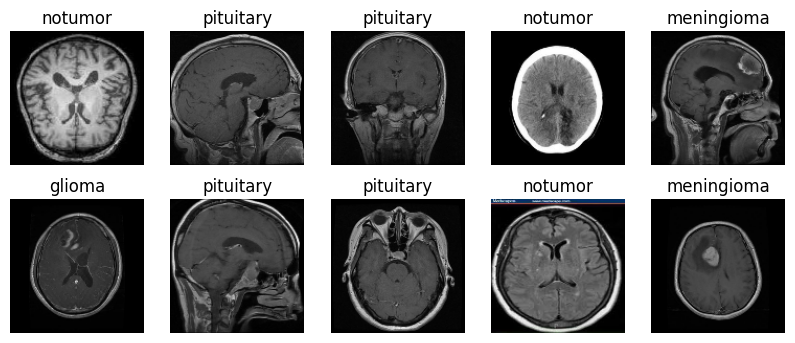

In [1000]:
## Plot the data sample
plt.figure(figsize=(10,4))
for image,label in test_set.take(1):
  for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [1001]:
def test_image():
  for image,label in test_data:
    return image
test_image=test_image()
print(test_image.shape)


def test_image_label():
  for image,label in test_data:
    return label
test_label=test_image_label()
print(test_label.shape)

(32, 128, 128, 3)
(32,)


In [1002]:
precision=tf.keras.metrics.Precision()
recall=tf.keras.metrics.Recall()
accuracy=tf.keras.metrics.Accuracy()

In [1003]:
model_predictions_new=model.predict(test_image)
model_predictions_new.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


(32, 4)

In [1004]:
for batch in test_data.as_numpy_iterator():
    X, y = batch

    yhat = model.predict(X)  # (32, 4)
    yhat_classes = np.argmax(yhat, axis=1)  # (32,)

    precision.update_state(y, yhat_classes)
    recall.update_state(y,yhat_classes)
    accuracy.update_state(y,yhat_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

In [1005]:
precision.result(), recall.result(), accuracy.result()

(<tf.Tensor: shape=(), dtype=float32, numpy=0.9562321305274963>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.9940652847290039>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.9466056227684021>)

In [1006]:
## Evaluate the performance of the model based on th test data

In [1007]:
precision=tf.keras.metrics.Precision()
recall=tf.keras.metrics.Recall()
accuracy=tf.keras.metrics.Accuracy()

In [1008]:
predictions=model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [1009]:
predictions[1]

array([6.3644529e-10, 5.0993356e-05, 2.9562841e-08, 9.9994898e-01],
      dtype=float32)

In [1010]:
## Make the prediction based on single  value

In [1011]:
predictions[1]

array([6.3644529e-10, 5.0993356e-05, 2.9562841e-08, 9.9994898e-01],
      dtype=float32)

In [1012]:
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [1013]:
## get the predicted class  index
import numpy  as np
predicted_index=np.argmax(predictions[1])
predicted_index

np.int64(3)

In [1014]:
class_name=['glioma','meningioma','notumor', 'pituitary']
predicted_class=class_name[predicted_index]
print("Brain Tumor : ",predicted_class)

Brain Tumor :  pituitary


In [1018]:
## use this model based on the user data

In [1019]:
!pip install opencv-python

In [1020]:
import cv2

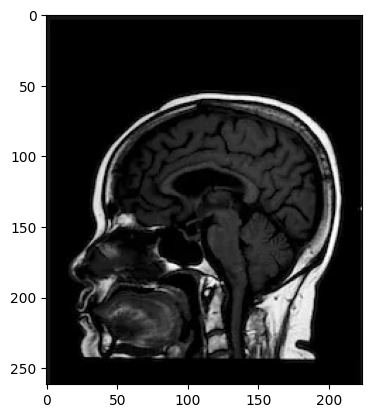

In [1031]:
image=cv2.imread("/content/brain-tumor-mri-dataset/Testing/notumor/Te-noTr_0004.jpg")
plt.imshow(image)
plt.show()

In [1032]:


## data preprocessing

In [1033]:

resized_image=tf.image.resize(image,IMAGE_SIZE)
scaled_image=resized_image/255

In [1034]:
scaled_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.08606388, 0.08606388, 0.08606388],
        [0.07957261, 0.07957261, 0.07957261],
        [0.09313726, 0.09313726, 0.09313726],
        ...,
        [0.08592984, 0.08592984, 0.08592984],
        [0.08461627, 0.08461627, 0.08461627],
        [0.08909696, 0.08909696, 0.08909696]],

       [[0.08779489, 0.08779489, 0.08779489],
        [0.09451976, 0.09451976, 0.09451976],
        [0.08425245, 0.08425245, 0.08425245],
        ...,
        [0.08676471, 0.08676471, 0.08676471],
        [0.08628217, 0.08628217, 0.08628217],
        [0.08555836, 0.08555836, 0.08555836]],

       [[0.08479626, 0.08479626, 0.08479626],
        [0.07616039, 0.07616039, 0.07616039],
        [0.00300245, 0.00300245, 0.00300245],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.08811274, 0.08811274, 0.08811274]],

       ...,

       [[0.08627451, 0.08627451, 0.08627451],
        [0.07

In [1035]:
scaled_image.shape

TensorShape([128, 128, 3])

In [1036]:
## expand the diminesion of image

In [1037]:
user_image=np.expand_dims(scaled_image,0).shape
user_image

(1, 128, 128, 3)

In [1038]:

predictions_new=model.predict(np.expand_dims(scaled_image,0))
predictions_new

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[3.1009631e-17, 3.6588063e-10, 1.0000000e+00, 1.0033672e-21]],
      dtype=float32)

In [1039]:

## get the predicted class  index
import numpy  as np
predicted_index_new=np.argmax(predictions_new)
predicted_index_new

np.int64(2)

In [1040]:



class_name=['glioma','meningeoma','notumor', 'pituitary']
predicted_class_new=class_name[predicted_index_new]
print("Brain Tumor : ",predicted_class_new)

Brain Tumor :  notumor
